In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
%matplotlib inline 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df = df.replace({"Species":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

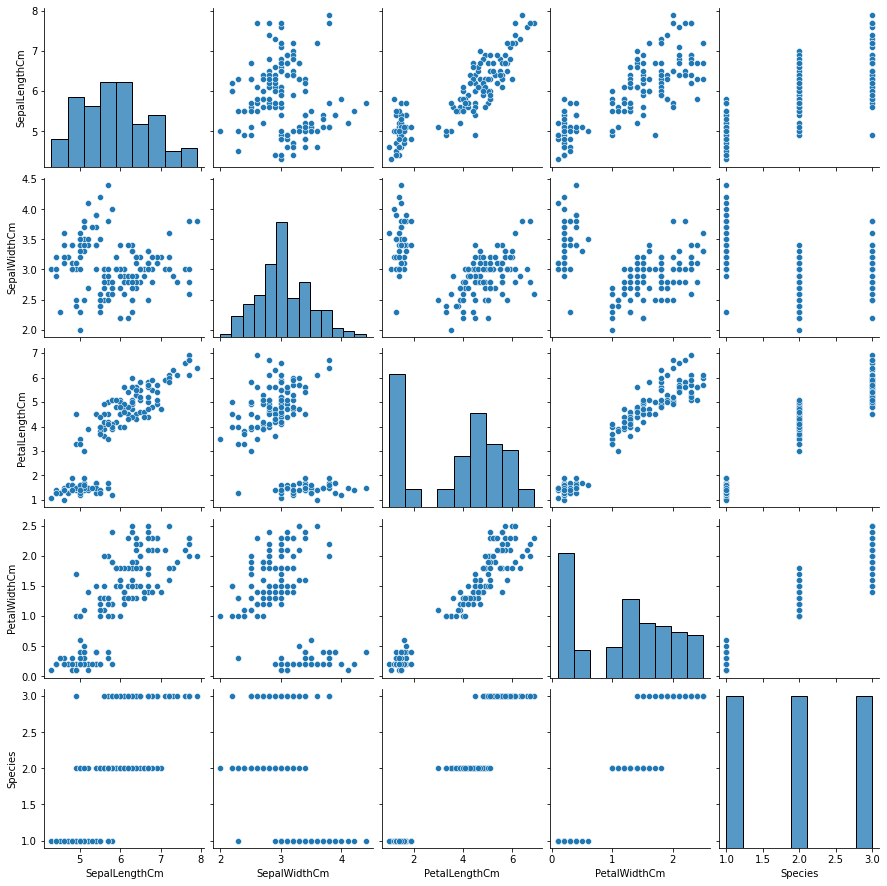

In [ ]:
sns.pairplot(df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species']])

Text(0.5, 1.0, 'Correlation On iris Classes')

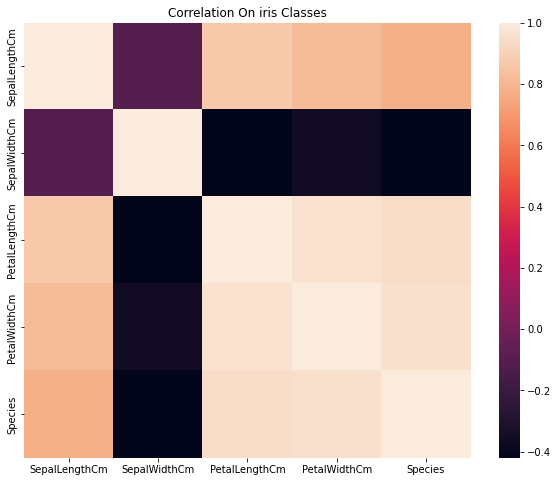

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species']].corr())
plt.title('Correlation On iris Classes')

In [ ]:
X=df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']]
y=df['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 96.36 %
Standard Deviation: 6.03 %


In [ ]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]
Accuracy: 36.67 %
Standard Deviation: 3.16 %


In [ ]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 97.27 %
Standard Deviation: 5.82 %


In [ ]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
classifier   = DecisionTreeClassifier()
classifier.fit(X_train,   y_train) #training the classifier
y_pred   = classifier.predict(X_test) #making precdictions
print(classification_report(y_test,   y_pred)) #Summary of the predictions made by the   classifier
print(confusion_matrix(y_test, y_pred)) #to evaluate the quality of the output
print('accuracy is',accuracy_score(y_pred,y_test)*100,'%') #Accuracy   score

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 97.36842105263158 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

y_pred   = random_forest.predict(X_test) #making precdictions
print(classification_report(y_test,   y_pred)) #Summary of the predictions made by the   classifier
print(confusion_matrix(y_test, y_pred)) #to evaluate the quality of the output
print('accuracy is',accuracy_score(y_pred,y_test)*100,'%') #Accuracy   score

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 97.36842105263158 %


In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

y_pred   = xgb_clf.predict(X_test) #making precdictions
print(classification_report(y_test,   y_pred)) #Summary of the predictions made by the   classifier
print(confusion_matrix(y_test, y_pred)) #to evaluate the quality of the output
print('accuracy is',accuracy_score(y_pred,y_test)*100,'%') #Accuracy   score

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 97.36842105263158 %
